Accuracy: 0.9807
              precision    recall  f1-score   support

         acc       0.93      0.99      0.96       115
        good       1.00      0.86      0.92        21
       unacc       1.00      0.99      0.99       363
       vgood       0.95      0.95      0.95        20

    accuracy                           0.98       519
   macro avg       0.97      0.95      0.96       519
weighted avg       0.98      0.98      0.98       519

            pred_acc  pred_good  pred_unacc  pred_vgood
true_acc         114          0           0           1
true_good          3         18           0           0
true_unacc         5          0         358           0
true_vgood         1          0           0          19


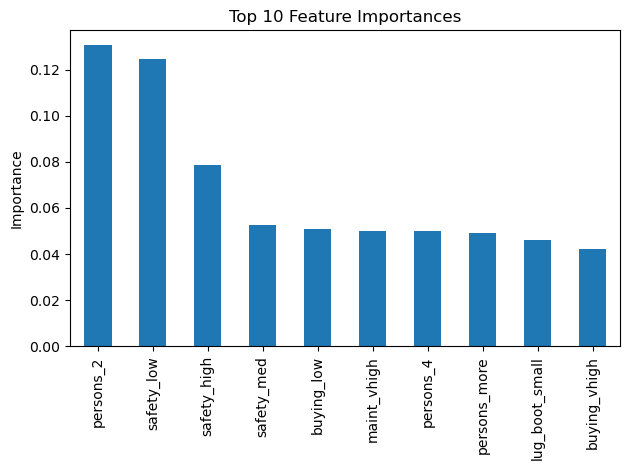

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_csv('car_evaluation.csv')
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

X = df.drop(columns='class')
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_train = pd.get_dummies(X_train, drop_first=False)
X_test = pd.get_dummies(X_test, drop_first=False)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

labels = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=[f"true_{c}" for c in labels], columns=[f"pred_{c}" for c in labels])
print(cm_df)

fi = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(10)
plt.figure()
fi.plot(kind='bar')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()
